In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore", message=".*keepdims.*", category=FutureWarning)

In [16]:
lol_data = pd.read_csv("C:/Users/Admin/Downloads/Untitled Folder/final_league_of_legends_data.csv")

In [17]:
lol_data.dropna(inplace=True)

In [18]:
lol_data

,Player Name,championId,role,kills,deaths,assists,totalDamageDealt,totalDamageTaken,goldEarned,totalMinionsKilled,win,dragons,barons,turretsKilled
0,GirlyisTeepee,92,TOP,3,4,6,10389,14614,8007,128,True,3.0,1.0,4.0
1,T1 VIPERGUMAYUZI,887,JUNGLE,7,2,4,15836,25959,10231,23,True,3.0,1.0,4.0
2,PridefulQueen,99,MIDDLE,4,3,5,13491,7868,9888,173,True,3.0,1.0,4.0
3,Chef He3ShOt,429,BOTTOM,5,3,4,10130,10854,9279,154,True,3.0,1.0,4.0
5,Boa Hancock,6,TOP,2,5,0,6518,15539,8577,144,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,Jsone,78,UTILITY,2,9,9,12294,25496,8541,30,True,2.0,0.0,11.0
6225,nithali,35,JUNGLE,9,8,16,20379,32252,12958,25,False,3.0,1.0,3.0
6226,Daawe,63,MIDDLE,6,10,7,22935,26129,11431,159,False,3.0,1.0,3.0
6227,regate,30,BOTTOM,10,7,17,50335,22468,16285,222,False,3.0,1.0,3.0


In [19]:
csgo_data = pd.read_csv("C:/Users/Admin/Downloads/Untitled Folder/CSGO_detailed_player_stats.csv")

In [20]:
csgo_data.dropna(inplace=True)

In [21]:
csgo_data

,Player Name,Total Kills,Headshot %,Total Deaths,K/D Ratio,Damage / Round,Grenade Damage / Round,Maps Played,Rounds Played,Kills / Round,Assists / Round,Deaths / Round,Saved by Teammate / Round,Saved Teammates / Round,Rating 2.0
0,donk,3593,60.0%,2632,1.37,95.8,3.6,179,3917,0.92,0.20,0.67,0.11,0.16,1.38
1,m0NESY,2913,41.2%,2155,1.35,81.1,3.0,164,3637,0.80,0.13,0.59,0.10,0.12,1.27
2,XANTARES,2848,51.0%,2422,1.18,87.4,7.5,167,3765,0.76,0.24,0.64,0.10,0.12,1.24
3,malbsMd,3575,64.5%,3104,1.15,86.4,5.8,212,4509,0.79,0.21,0.69,0.11,0.11,1.24
4,smooya,2880,31.0%,2254,1.28,78.7,3.0,160,3663,0.79,0.14,0.62,0.10,0.13,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,Furlan,2588,53.2%,3284,0.79,67.9,7.9,196,4502,0.57,0.20,0.73,0.12,0.08,0.92
415,ben1337,2826,49.0%,3471,0.81,63.5,5.9,226,5028,0.56,0.19,0.69,0.13,0.11,0.91
416,karrigan,2415,55.7%,3085,0.78,64.1,5.1,191,4312,0.56,0.18,0.72,0.11,0.06,0.90
417,CutzMeretz,2529,52.1%,3086,0.82,69.1,4.9,193,4194,0.60,0.16,0.74,0.10,0.07,0.90


In [22]:
csgo_data['Total Assists'] = csgo_data['Assists / Round'] * csgo_data['Rounds Played']
csgo_data['Total Damage'] = csgo_data['Damage / Round'] * csgo_data['Rounds Played']

In [23]:
csgo_data

,Player Name,Total Kills,Headshot %,Total Deaths,K/D Ratio,Damage / Round,Grenade Damage / Round,Maps Played,Rounds Played,Kills / Round,Assists / Round,Deaths / Round,Saved by Teammate / Round,Saved Teammates / Round,Rating 2.0,Total Assists,Total Damage
0,donk,3593,60.0%,2632,1.37,95.8,3.6,179,3917,0.92,0.20,0.67,0.11,0.16,1.38,783.40,375248.6
1,m0NESY,2913,41.2%,2155,1.35,81.1,3.0,164,3637,0.80,0.13,0.59,0.10,0.12,1.27,472.81,294960.7
2,XANTARES,2848,51.0%,2422,1.18,87.4,7.5,167,3765,0.76,0.24,0.64,0.10,0.12,1.24,903.60,329061.0
3,malbsMd,3575,64.5%,3104,1.15,86.4,5.8,212,4509,0.79,0.21,0.69,0.11,0.11,1.24,946.89,389577.6
4,smooya,2880,31.0%,2254,1.28,78.7,3.0,160,3663,0.79,0.14,0.62,0.10,0.13,1.22,512.82,288278.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,Furlan,2588,53.2%,3284,0.79,67.9,7.9,196,4502,0.57,0.20,0.73,0.12,0.08,0.92,900.40,305685.8
415,ben1337,2826,49.0%,3471,0.81,63.5,5.9,226,5028,0.56,0.19,0.69,0.13,0.11,0.91,955.32,319278.0
416,karrigan,2415,55.7%,3085,0.78,64.1,5.1,191,4312,0.56,0.18,0.72,0.11,0.06,0.90,776.16,276399.2
417,CutzMeretz,2529,52.1%,3086,0.82,69.1,4.9,193,4194,0.60,0.16,0.74,0.10,0.07,0.90,671.04,289805.4


In [24]:
lol_data['K/D Ratio'] = lol_data.apply(lambda row: row['kills'] / row['deaths'] if row['deaths'] > 0 else row['kills'], axis=1)

In [25]:
lol_data

,Player Name,championId,role,kills,deaths,assists,totalDamageDealt,totalDamageTaken,goldEarned,totalMinionsKilled,win,dragons,barons,turretsKilled,K/D Ratio
0,GirlyisTeepee,92,TOP,3,4,6,10389,14614,8007,128,True,3.0,1.0,4.0,0.750000
1,T1 VIPERGUMAYUZI,887,JUNGLE,7,2,4,15836,25959,10231,23,True,3.0,1.0,4.0,3.500000
2,PridefulQueen,99,MIDDLE,4,3,5,13491,7868,9888,173,True,3.0,1.0,4.0,1.333333
3,Chef He3ShOt,429,BOTTOM,5,3,4,10130,10854,9279,154,True,3.0,1.0,4.0,1.666667
5,Boa Hancock,6,TOP,2,5,0,6518,15539,8577,144,False,0.0,0.0,1.0,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,Jsone,78,UTILITY,2,9,9,12294,25496,8541,30,True,2.0,0.0,11.0,0.222222
6225,nithali,35,JUNGLE,9,8,16,20379,32252,12958,25,False,3.0,1.0,3.0,1.125000
6226,Daawe,63,MIDDLE,6,10,7,22935,26129,11431,159,False,3.0,1.0,3.0,0.600000
6227,regate,30,BOTTOM,10,7,17,50335,22468,16285,222,False,3.0,1.0,3.0,1.428571


In [26]:
# Define target as continuous K/D Ratio for LoL
y_lol = lol_data['K/D Ratio']

# Define features (dropping irrelevant columns)
X_lol = lol_data.drop(columns=['Player Name', 'K/D Ratio', 'role'])  # Don't include K/D Ratio in features
X_lol_train, X_lol_test, y_lol_train, y_lol_test = train_test_split(X_lol, y_lol, test_size=0.2, random_state=42)

In [40]:
# Remove the '%' sign and convert the column to float
csgo_data['Headshot %'] = csgo_data['Headshot %'].str.replace('%', '').astype(float)

# Now proceed with defining the features and target
X_csgo = csgo_data.drop(columns=['Player Name', 'K/D Ratio'])  # Drop non-feature columns
y_csgo = csgo_data['K/D Ratio']  # K/D Ratio as target


In [42]:
# Split the data into training and testing sets (80% train, 20% test)
X_csgo_train, X_csgo_test, y_csgo_train, y_csgo_test = train_test_split(X_csgo, y_csgo, test_size=0.2, random_state=42)


In [52]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    # Sort values to make the plot easier to read
    indices = np.argsort(y_test)
    
    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    
    # Plot actual values
    plt.plot(np.arange(len(y_test)), np.array(y_test)[indices], label='Actual K/D Ratio', color='blue', marker='o')

    # Plot predicted values
    plt.plot(np.arange(len(y_test)), np.array(y_pred)[indices], label='Predicted K/D Ratio', color='red', linestyle='--', marker='x')
    
    # Labels and Title
    plt.title(f'Actual vs Predicted K/D Ratio ({model_name})')
    plt.xlabel('Players (Test Samples)')
    plt.ylabel('K/D Ratio')
    plt.legend()
    
    
    # Show the plot
    plt.show()

    # Evaluate the model (optional, included here for convenience)
    print(f"{model_name} R²:", r2_score(y_test, y_pred))
    print(f"{model_name} MSE:", mean_squared_error(y_test, y_pred))


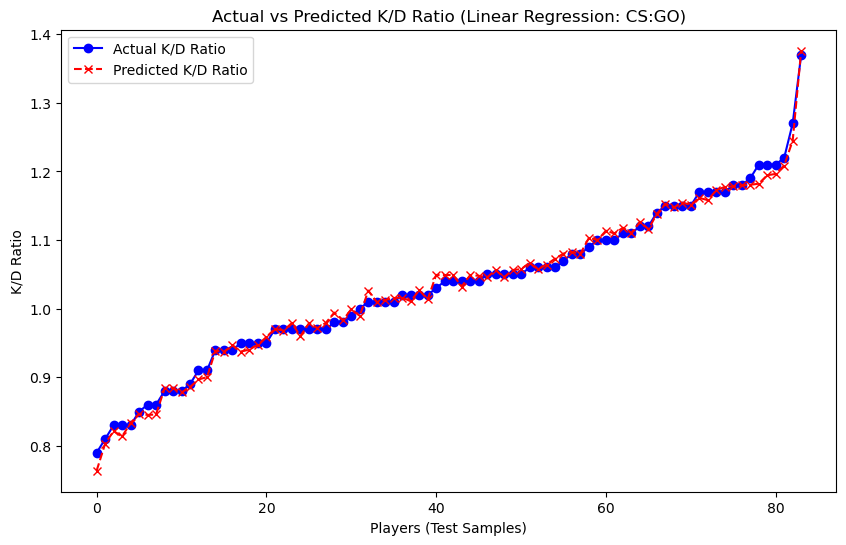

Linear Regression: CS:GO R²: 0.9929933500478438
Linear Regression: CS:GO MSE: 9.185970310786856e-05


In [100]:
# Train the Linear Regression model
lr_model_csgo = LinearRegression()
lr_model_csgo.fit(X_csgo_train, y_csgo_train)

# Predict on the test data
y_csgo_pred = lr_model_csgo.predict(X_csgo_test)

# Evaluate the model
# Plot actual vs predicted for Linear Regression
plot_actual_vs_predicted(y_csgo_test, y_csgo_pred, 'Linear Regression: CS:GO')



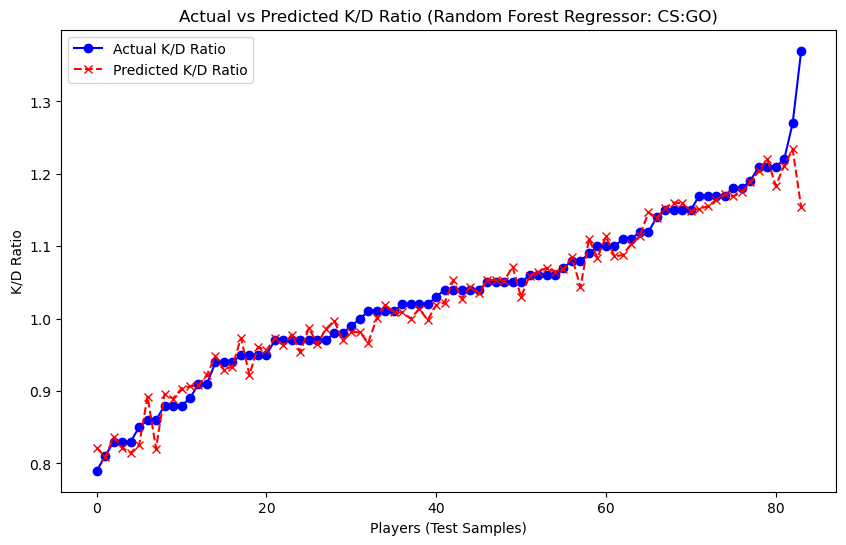

Random Forest Regressor: CS:GO R²: 0.938332592990562
Random Forest Regressor: CS:GO MSE: 0.0008084819047619006


In [101]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor
rf_model_csgo = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_csgo.fit(X_csgo_train, y_csgo_train)

# Predict on the test data
y_rf_pred = rf_model_csgo.predict(X_csgo_test)

# Evaluate the model

# Plot actual vs predicted
plot_actual_vs_predicted(y_csgo_test, y_rf_pred, 'Random Forest Regressor: CS:GO')


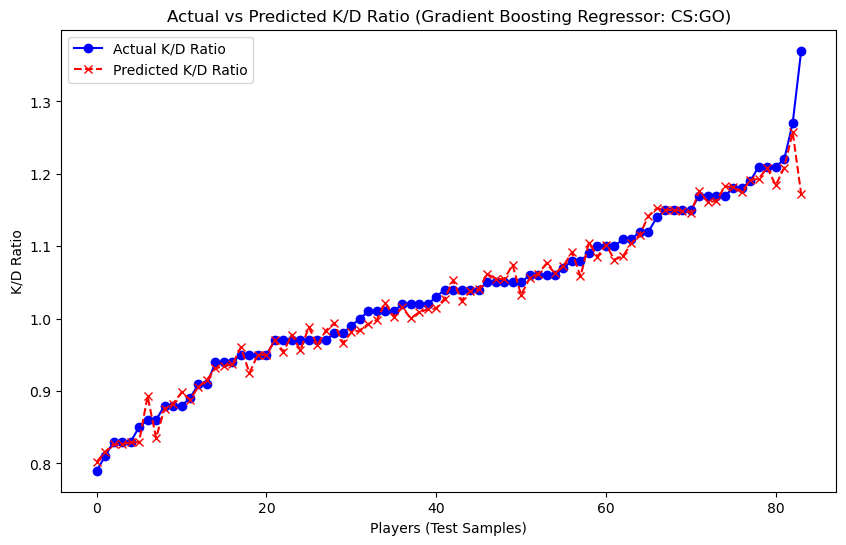

Gradient Boosting Regressor: CS:GO R²: 0.9525633927556874
Gradient Boosting Regressor: CS:GO MSE: 0.0006219109970758864


In [102]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting Regressor
gb_model_csgo = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model_csgo.fit(X_csgo_train, y_csgo_train)

# Predict on the test data
y_gb_pred = gb_model_csgo.predict(X_csgo_test)


# Plot actual vs predicted
plot_actual_vs_predicted(y_csgo_test, y_gb_pred, 'Gradient Boosting Regressor: CS:GO')


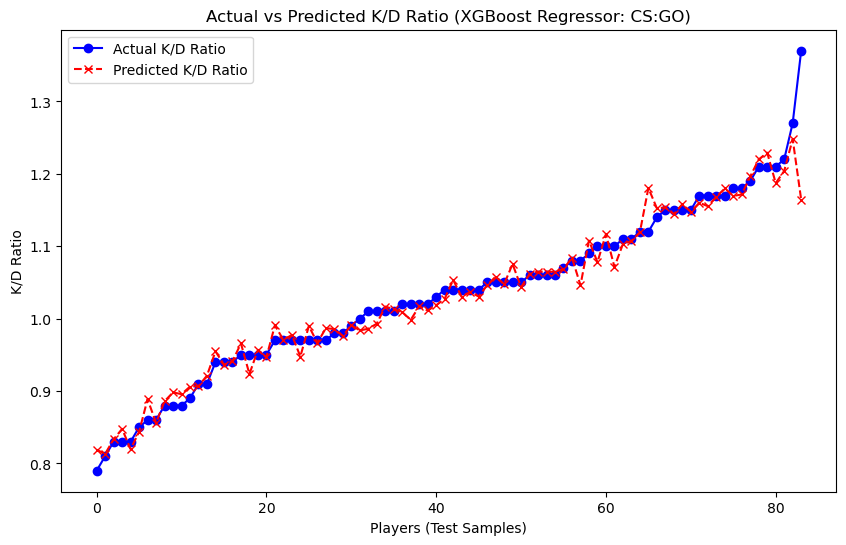

XGBoost Regressor: CS:GO R²: 0.9444200277895626
XGBoost Regressor: CS:GO MSE: 0.0007286734432085133


In [104]:
import xgboost as xgb

# Convert data to DMatrix format (XGBoost's internal format)
dtrain_csgo = xgb.DMatrix(X_csgo_train, label=y_csgo_train)
dtest_csgo = xgb.DMatrix(X_csgo_test, label=y_csgo_test)

# Set XGBoost parameters
params_csgo = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 6,
    'eta': 0.1,
    'eval_metric': 'rmse'
}

# Train the model
xgb_model_csgo = xgb.train(params_csgo, dtrain_csgo, num_boost_round=100)

# Predict on the test data
y_xgb_pred = xgb_model_csgo.predict(dtest_csgo)

# Evaluate the model
# Predict on the test data (make sure you already converted the test data into DMatrix format)
y_xgb_pred = xgb_model_csgo.predict(dtest_csgo)

# Plot actual vs predicted
plot_actual_vs_predicted(y_csgo_test, y_xgb_pred, 'XGBoost Regressor: CS:GO')



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 335, number of used features: 15
[LightGBM] [Info] Start training from score 1.030299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

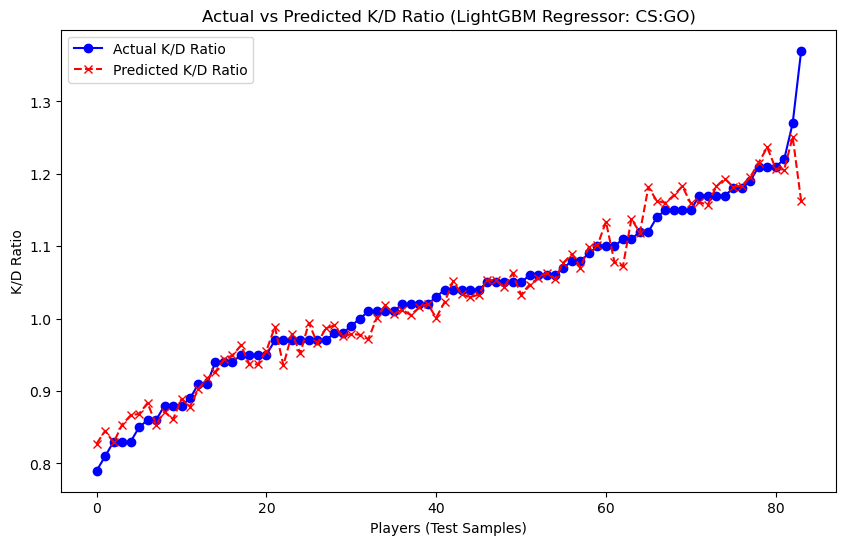

LightGBM Regressor: CS:GO R²: 0.936126736486796
LightGBM Regressor: CS:GO MSE: 0.0008374014775845958


In [105]:
import lightgbm as lgb

# Train the LightGBM Regressor
lgb_model_csgo = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=100)
lgb_model_csgo.fit(X_csgo_train, y_csgo_train)

# Predict on the test data
y_lgb_pred = lgb_model_csgo.predict(X_csgo_test)

# Evaluate the model
# Plot actual vs predicted
plot_actual_vs_predicted(y_csgo_test, y_lgb_pred, 'LightGBM Regressor: CS:GO')



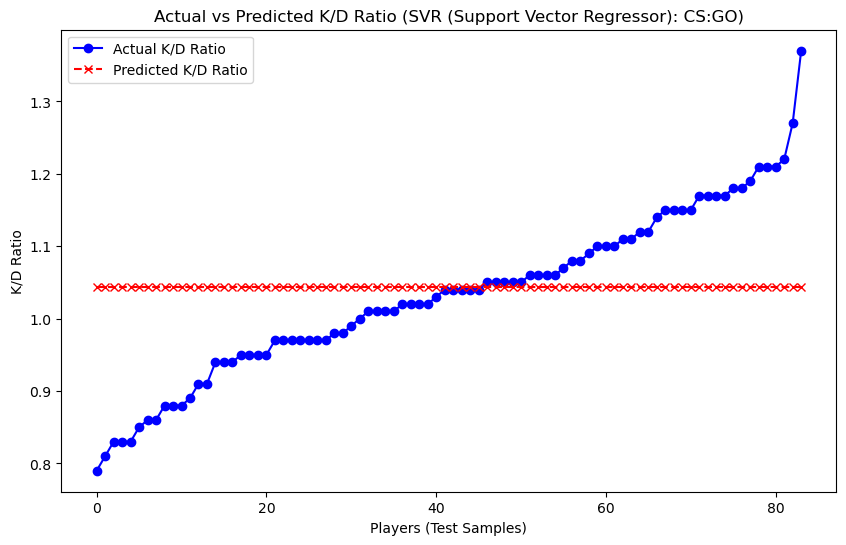

SVR (Support Vector Regressor): CS:GO R²: -0.008905369745251912
SVR (Support Vector Regressor): CS:GO MSE: 0.013227112580415685


In [106]:
from sklearn.svm import SVR

# Train the SVR model
svr_model_csgo = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model_csgo.fit(X_csgo_train, y_csgo_train)

# Predict on the test data
y_svr_pred = svr_model_csgo.predict(X_csgo_test)

# Evaluate the model
# Plot actual vs predicted
plot_actual_vs_predicted(y_csgo_test, y_svr_pred, 'SVR (Support Vector Regressor): CS:GO')



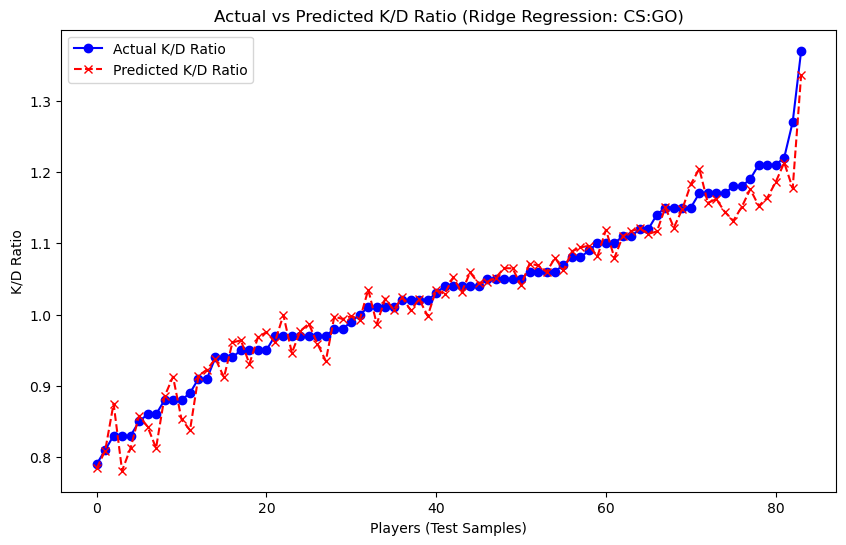

Ridge Regression: CS:GO R²: 0.9564895198507875
Ridge Regression: CS:GO MSE: 0.0005704380575423974


In [107]:
from sklearn.linear_model import Ridge

# Train the Ridge Regressor
ridge_model_csgo = Ridge(alpha=1.0)
ridge_model_csgo.fit(X_csgo_train, y_csgo_train)

# Predict on the test data
y_ridge_pred = ridge_model_csgo.predict(X_csgo_test)

# Evaluate the model
# Plot actual vs predicted
plot_actual_vs_predicted(y_csgo_test, y_ridge_pred, 'Ridge Regression: CS:GO')



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.470e-03, tolerance: 3.633e-04
  model = cd_fast.enet_coordinate_descent(


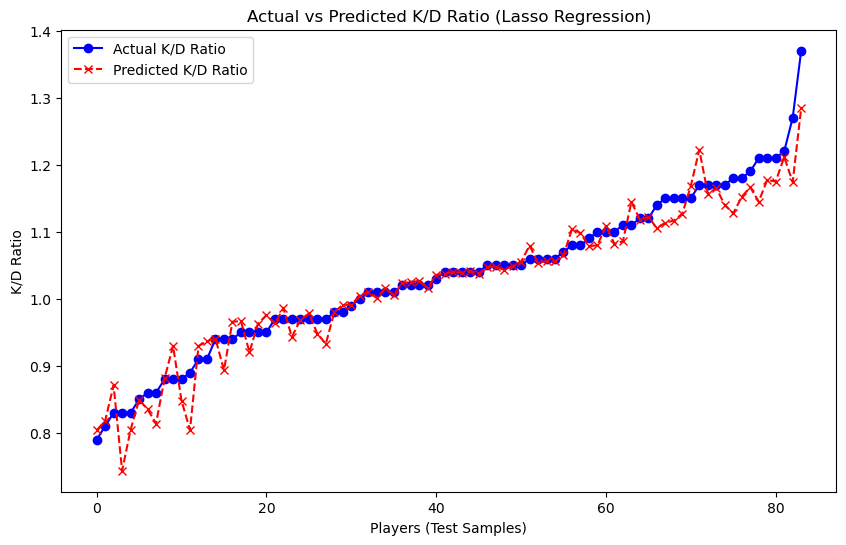

Lasso Regression R²: 0.9341124730579748
Lasso Regression MSE: 0.0008638091962256


In [66]:
from sklearn.linear_model import Lasso

# Train the Lasso Regressor
lasso_model_csgo = Lasso(alpha=0.1)
lasso_model_csgo.fit(X_csgo_train, y_csgo_train)

# Predict on the test data
y_lasso_pred = lasso_model_csgo.predict(X_csgo_test)

# Evaluate the model
# Plot actual vs predicted
plot_actual_vs_predicted(y_csgo_test, y_lasso_pred, 'Lasso Regression')



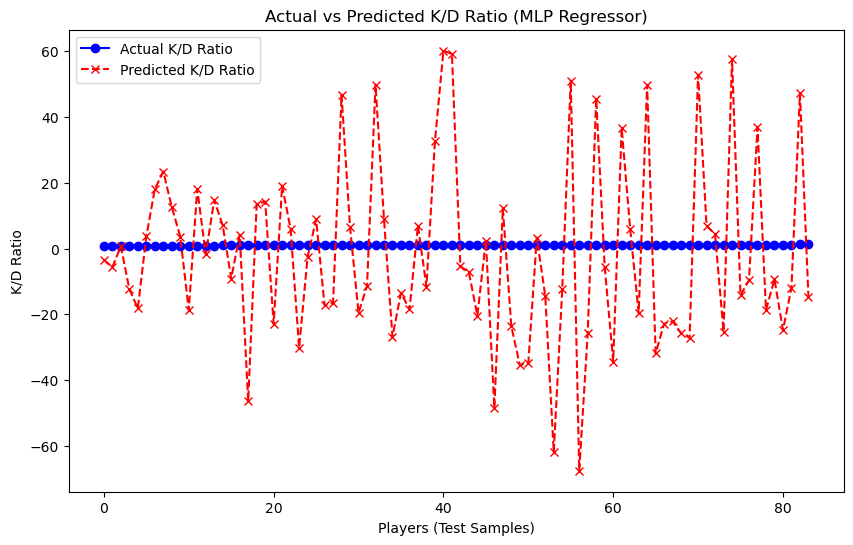

MLP Regressor R²: -58117.61917298707
MLP Regressor MSE: 761.9560187428801


In [67]:
from sklearn.neural_network import MLPRegressor

# Train the MLP Regressor
mlp_model_csgo = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp_model_csgo.fit(X_csgo_train, y_csgo_train)

# Predict on the test data
y_mlp_pred = mlp_model_csgo.predict(X_csgo_test)

# Evaluate the model
# Plot actual vs predicted
plot_actual_vs_predicted(y_csgo_test, y_mlp_pred, 'MLP Regressor')



In [69]:
from sklearn.metrics import r2_score

# Calculate R² for all models

# Linear Regression
r2_linear = r2_score(y_csgo_test, y_csgo_pred)

# Random Forest Regressor
r2_rf = r2_score(y_csgo_test, y_rf_pred)

# Gradient Boosting Regressor
r2_gb = r2_score(y_csgo_test, y_gb_pred)

# XGBoost Regressor
r2_xgb = r2_score(y_csgo_test, y_xgb_pred)

# LightGBM Regressor
r2_lgb = r2_score(y_csgo_test, y_lgb_pred)

# Support Vector Regressor (SVR)
r2_svr = r2_score(y_csgo_test, y_svr_pred)

# Ridge Regression
r2_ridge = r2_score(y_csgo_test, y_ridge_pred)

# Lasso Regression
r2_lasso = r2_score(y_csgo_test, y_lasso_pred)

# MLP Regressor (Neural Network)
r2_mlp = r2_score(y_csgo_test, y_mlp_pred)


In [108]:
# Dictionary to store R² scores of all models
r2_scores = {
    'Linear Regression': r2_linear,
    'Random Forest': r2_rf,
    'Gradient Boosting': r2_gb,
    'XGBoost': r2_xgb,
    'LightGBM': r2_lgb,
    'SVR': r2_svr,
    'Ridge Regression': r2_ridge,
    'Lasso Regression': r2_lasso,
}


In [125]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for all models

# Linear Regression
mse_linear = mean_squared_error(y_csgo_test, y_csgo_pred)
mae_linear = mean_absolute_error(y_csgo_test, y_csgo_pred)
r2_linear = r2_score(y_csgo_test, y_csgo_pred)

# Random Forest Regressor
mse_rf = mean_squared_error(y_csgo_test, y_rf_pred)
mae_rf = mean_absolute_error(y_csgo_test, y_rf_pred)
r2_rf = r2_score(y_csgo_test, y_rf_pred)

# Gradient Boosting Regressor
mse_gb = mean_squared_error(y_csgo_test, y_gb_pred)
mae_gb = mean_absolute_error(y_csgo_test, y_gb_pred)
r2_gb = r2_score(y_csgo_test, y_gb_pred)

# XGBoost Regressor
mse_xgb = mean_squared_error(y_csgo_test, y_xgb_pred)
mae_xgb = mean_absolute_error(y_csgo_test, y_xgb_pred)
r2_xgb = r2_score(y_csgo_test, y_xgb_pred)

# LightGBM Regressor
mse_lgb = mean_squared_error(y_csgo_test, y_lgb_pred)
mae_lgb = mean_absolute_error(y_csgo_test, y_lgb_pred)
r2_lgb = r2_score(y_csgo_test, y_lgb_pred)

# Support Vector Regressor (SVR)
mse_svr = mean_squared_error(y_csgo_test, y_svr_pred)
mae_svr = mean_absolute_error(y_csgo_test, y_svr_pred)
r2_svr = r2_score(y_csgo_test, y_svr_pred)

# Ridge Regression
mse_ridge = mean_squared_error(y_csgo_test, y_ridge_pred)
mae_ridge = mean_absolute_error(y_csgo_test, y_ridge_pred)
r2_ridge = r2_score(y_csgo_test, y_ridge_pred)

# Lasso Regression
mse_lasso = mean_squared_error(y_csgo_test, y_lasso_pred)
mae_lasso = mean_absolute_error(y_csgo_test, y_lasso_pred)
r2_lasso = r2_score(y_csgo_test, y_lasso_pred)

# Dictionary to store metrics of all models
metrics = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'SVR', 'Ridge Regression', 'Lasso Regression'],
    'MSE(CS:GO)': [mse_linear, mse_rf, mse_gb, mse_xgb, mse_lgb, mse_svr, mse_ridge, mse_lasso],
    'MAE(CS:GO)': [mae_linear, mae_rf, mae_gb, mae_xgb, mae_lgb, mae_svr, mae_ridge, mae_lasso],
    'R²(CS:GO)': [r2_linear, r2_rf, r2_gb, r2_xgb, r2_lgb, r2_svr, r2_ridge, r2_lasso]
}

# Create a DataFrame to compare all models
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
metrics_df


,Model,MSE(CS:GO),MAE(CS:GO),R²(CS:GO)
0,Linear Regression,0.000092,0.007685,0.992993
1,Random Forest,0.000808,0.015121,0.938333
2,Gradient Boosting,0.000622,0.012238,0.952563
3,XGBoost,0.000729,0.013879,0.944420
4,LightGBM,0.000837,0.016476,0.936127
5,SVR,0.013227,0.091171,-0.008905
6,Ridge Regression,0.000570,0.017969,0.956490
7,Lasso Regression,0.000864,0.020235,0.934112


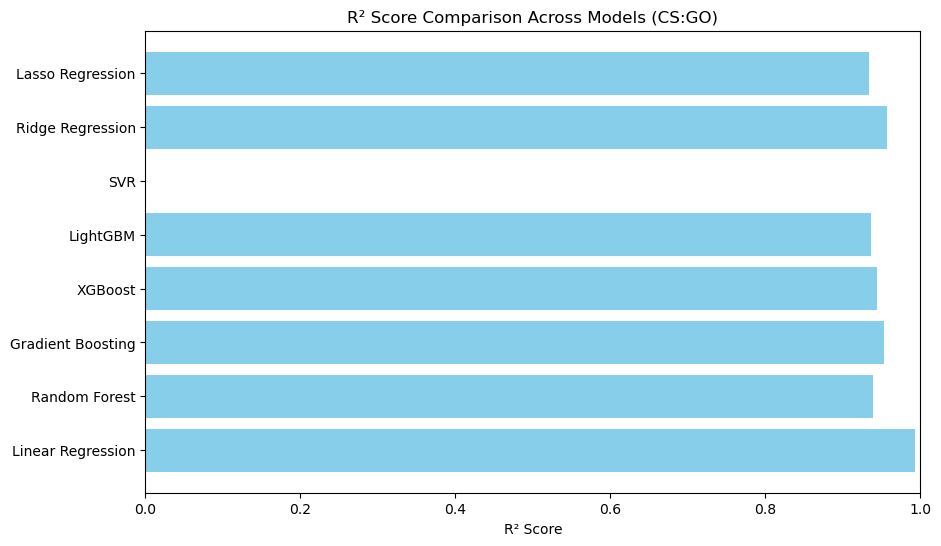

In [109]:
# Plot R² scores for comparison
plt.figure(figsize=(10, 6))
model_names = list(r2_scores.keys())
r2_values = list(r2_scores.values())

plt.barh(model_names, r2_values, color='skyblue')
plt.xlabel('R² Score')
plt.title('R² Score Comparison Across Models (CS:GO)')
plt.xlim(0, 1)  # R² score ranges from 0 to 1
plt.show()


# LOL PREDICTIVE MODELING 

In [78]:
# Define target as continuous K/D Ratio for LoL
y_lol = lol_data['K/D Ratio']

# Define features (dropping irrelevant columns)
X_lol = lol_data.drop(columns=['Player Name', 'K/D Ratio', 'role', 'win'])  # Don't include K/D Ratio in features
X_lol_train, X_lol_test, y_lol_train, y_lol_test = train_test_split(X_lol, y_lol, test_size=0.2, random_state=42)

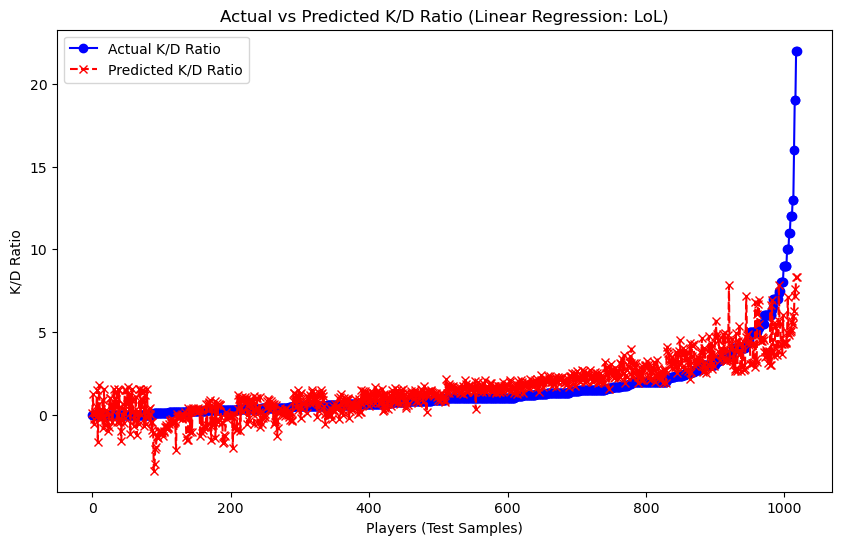

Linear Regression: LoL R²: 0.593517966111637
Linear Regression: LoL MSE: 2.019735740186826


In [110]:
# Train Linear Regression model
lr_model_lol = LinearRegression()
lr_model_lol.fit(X_lol_train, y_lol_train)

# Predict
y_lol_pred_linear = lr_model_lol.predict(X_lol_test)
plot_actual_vs_predicted(y_lol_test, y_lol_pred_linear, 'Linear Regression: LoL')


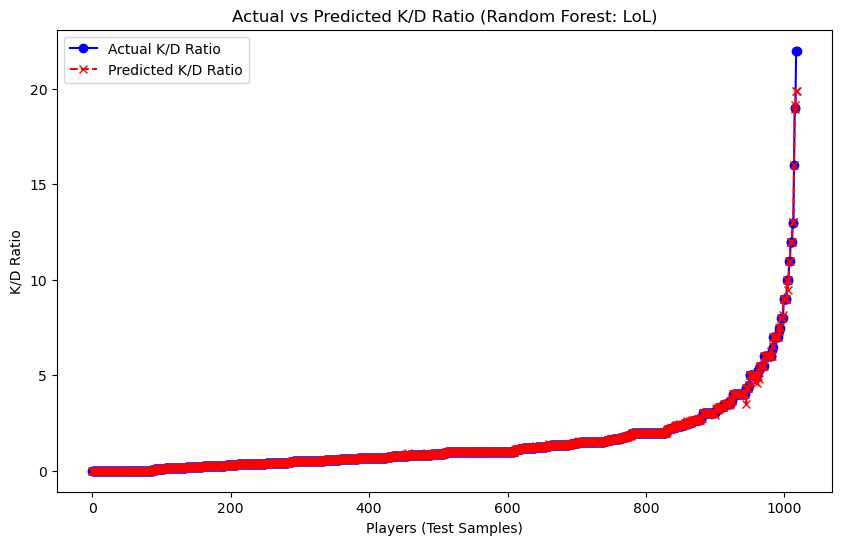

Random Forest: LoL R²: 0.9978840810339319
Random Forest: LoL MSE: 0.01051361881416035


In [111]:
# Train Random Forest Regressor
rf_model_lol = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_lol.fit(X_lol_train, y_lol_train)

# Predict
y_lol_pred_rf = rf_model_lol.predict(X_lol_test)
plot_actual_vs_predicted(y_lol_test, y_lol_pred_rf, 'Random Forest: LoL')



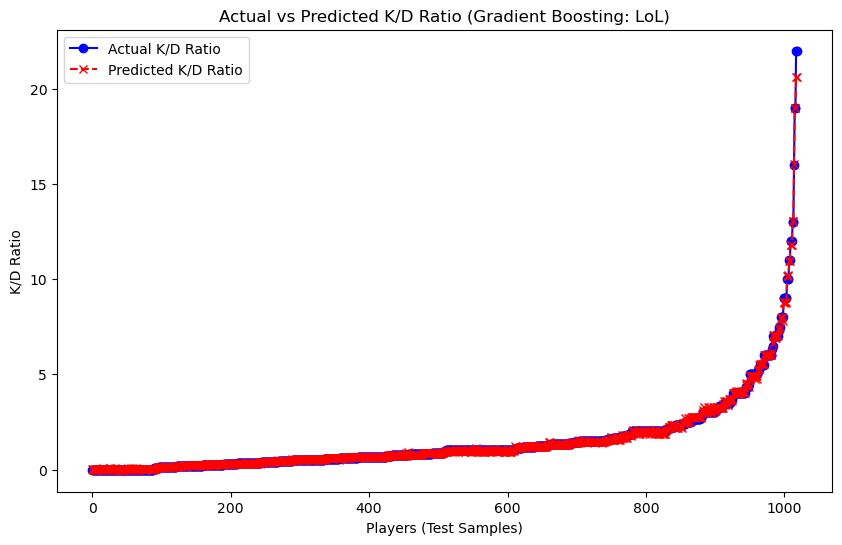

Gradient Boosting: LoL R²: 0.998473491434331
Gradient Boosting: LoL MSE: 0.007584945091644079


In [112]:
# Train Gradient Boosting Regressor
gb_model_lol = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model_lol.fit(X_lol_train, y_lol_train)

# Predict
y_lol_pred_gb = gb_model_lol.predict(X_lol_test)
plot_actual_vs_predicted(y_lol_test, y_lol_pred_gb, 'Gradient Boosting: LoL')


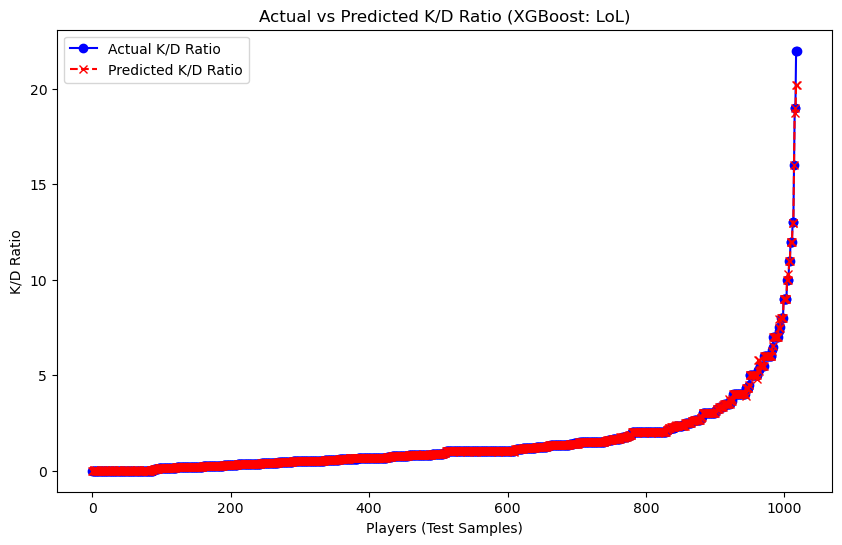

XGBoost: LoL R²: 0.9984361431502762
XGBoost: LoL MSE: 0.007770521963070547


In [113]:
import xgboost as xgb

# Convert LoL data to DMatrix format
dtrain_lol = xgb.DMatrix(X_lol_train, label=y_lol_train)
dtest_lol = xgb.DMatrix(X_lol_test, label=y_lol_test)

# Set XGBoost parameters
params_lol = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'eval_metric': 'rmse'
}

# Train the model
xgb_model_lol = xgb.train(params_lol, dtrain_lol, num_boost_round=100)

# Predict
y_lol_pred_xgb = xgb_model_lol.predict(dtest_lol)

plot_actual_vs_predicted(y_lol_test, y_lol_pred_xgb, 'XGBoost: LoL')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 4076, number of used features: 11
[LightGBM] [Info] Start training from score 1.535986


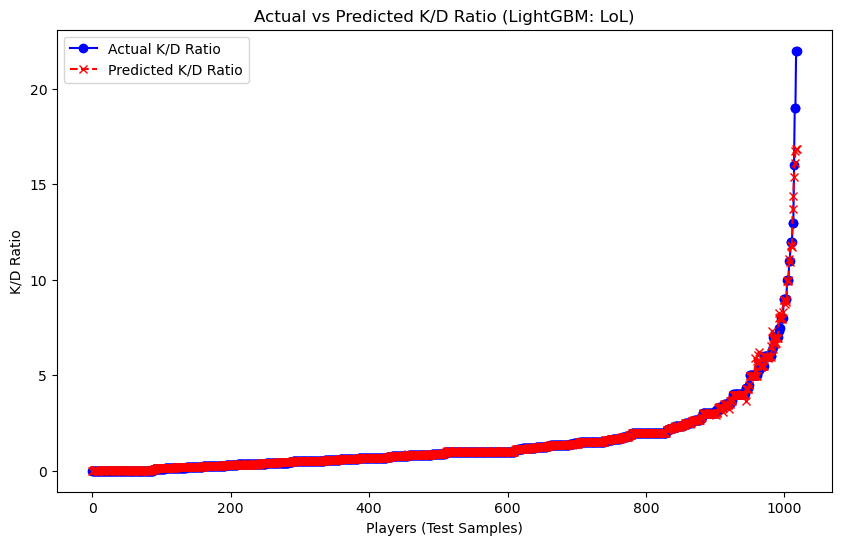

LightGBM: LoL R²: 0.9847497500397329
LightGBM: LoL MSE: 0.07577573502299896


In [114]:
import lightgbm as lgb

# Train LightGBM Regressor
lgb_model_lol = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=100)
lgb_model_lol.fit(X_lol_train, y_lol_train)

# Predict
y_lol_pred_lgb = lgb_model_lol.predict(X_lol_test)
plot_actual_vs_predicted(y_lol_test, y_lol_pred_lgb, 'LightGBM: LoL')


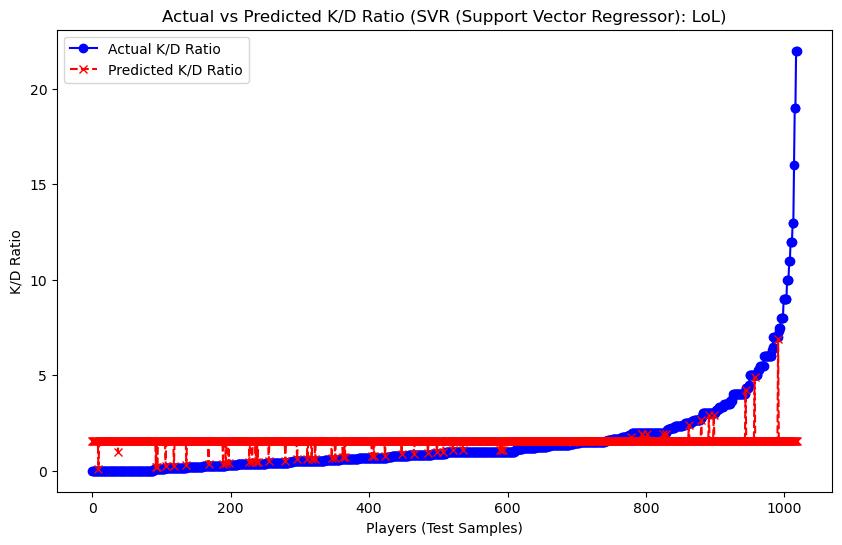

SVR (Support Vector Regressor): LoL R²: 0.019629788582501972
SVR (Support Vector Regressor): LoL MSE: 4.871282343460845


In [116]:
# Train SVR model
svr_model_lol = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model_lol.fit(X_lol_train, y_lol_train)

# Predict
y_lol_pred_svr = svr_model_lol.predict(X_lol_test)

plot_actual_vs_predicted(y_lol_test, y_lol_pred_svr, 'SVR (Support Vector Regressor): LoL')


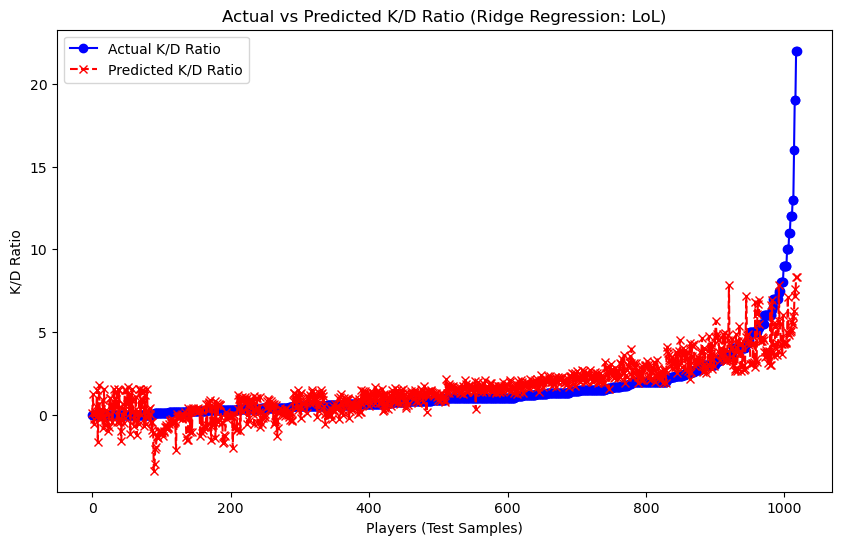

Ridge Regression: LoL R²: 0.5935178897361222
Ridge Regression: LoL MSE: 2.0197361196829515


In [117]:
# Train Ridge Regressor
ridge_model_lol = Ridge(alpha=1.0)
ridge_model_lol.fit(X_lol_train, y_lol_train)

# Predict
y_lol_pred_ridge = ridge_model_lol.predict(X_lol_test)
plot_actual_vs_predicted(y_lol_test, y_lol_pred_ridge, 'Ridge Regression: LoL')


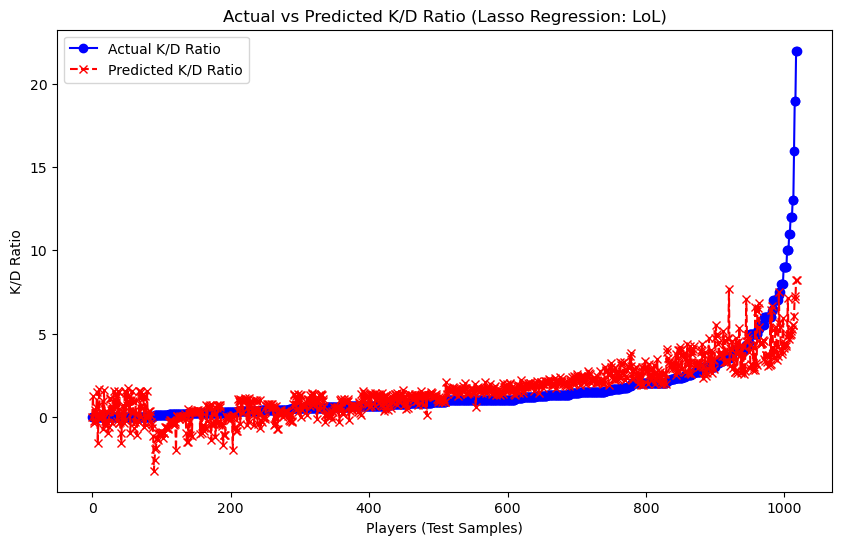

Lasso Regression: LoL R²: 0.5887246940398622
Lasso Regression: LoL MSE: 2.043552642555657


In [119]:
# Train Lasso Regressor
lasso_model_lol = Lasso(alpha=0.1)
lasso_model_lol.fit(X_lol_train, y_lol_train)

# Predict
y_lol_pred_lasso = lasso_model_lol.predict(X_lol_test)
plot_actual_vs_predicted(y_lol_test, y_lol_pred_lasso, 'Lasso Regression: LoL')

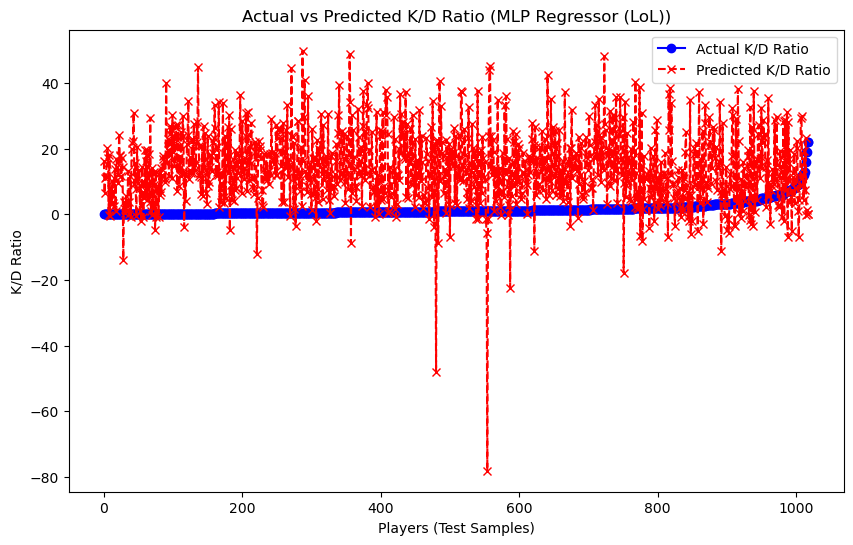

MLP Regressor (LoL) R²: -56.662611276061014
MLP Regressor (LoL) MSE: 286.5150908459241


In [99]:
# Train MLP Regressor
mlp_model_lol = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
mlp_model_lol.fit(X_lol_train, y_lol_train)

# Predict
y_lol_pred_mlp = mlp_model_lol.predict(X_lol_test)
plot_actual_vs_predicted(y_lol_test, y_lol_pred_mlp, 'MLP Regressor (LoL)')


In [124]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for all LOL models

# Linear Regression (LOL)
mse_linear_lol = mean_squared_error(y_lol_test, y_lol_pred_linear)
mae_linear_lol = mean_absolute_error(y_lol_test, y_lol_pred_linear)
r2_linear_lol = r2_score(y_lol_test, y_lol_pred_linear)

# Random Forest Regressor (LOL)
mse_rf_lol = mean_squared_error(y_lol_test, y_lol_pred_rf)
mae_rf_lol = mean_absolute_error(y_lol_test, y_lol_pred_rf)
r2_rf_lol = r2_score(y_lol_test, y_lol_pred_rf)

# Gradient Boosting Regressor (LOL)
mse_gb_lol = mean_squared_error(y_lol_test, y_lol_pred_gb)
mae_gb_lol = mean_absolute_error(y_lol_test, y_lol_pred_gb)
r2_gb_lol = r2_score(y_lol_test, y_lol_pred_gb)

# XGBoost Regressor (LOL)
mse_xgb_lol = mean_squared_error(y_lol_test, y_lol_pred_xgb)
mae_xgb_lol = mean_absolute_error(y_lol_test, y_lol_pred_xgb)
r2_xgb_lol = r2_score(y_lol_test, y_lol_pred_xgb)

# LightGBM Regressor (LOL)
mse_lgb_lol = mean_squared_error(y_lol_test, y_lol_pred_lgb)
mae_lgb_lol = mean_absolute_error(y_lol_test, y_lol_pred_lgb)
r2_lgb_lol = r2_score(y_lol_test, y_lol_pred_lgb)

# Support Vector Regressor (LOL)
mse_svr_lol = mean_squared_error(y_lol_test, y_lol_pred_svr)
mae_svr_lol = mean_absolute_error(y_lol_test, y_lol_pred_svr)
r2_svr_lol = r2_score(y_lol_test, y_lol_pred_svr)

# Ridge Regression (LOL)
mse_ridge_lol = mean_squared_error(y_lol_test, y_lol_pred_ridge)
mae_ridge_lol = mean_absolute_error(y_lol_test, y_lol_pred_ridge)
r2_ridge_lol = r2_score(y_lol_test, y_lol_pred_ridge)

# Lasso Regression (LOL)
mse_lasso_lol = mean_squared_error(y_lol_test, y_lol_pred_lasso)
mae_lasso_lol = mean_absolute_error(y_lol_test, y_lol_pred_lasso)
r2_lasso_lol = r2_score(y_lol_test, y_lol_pred_lasso)

# MLP Regressor (Neural Network) (LOL)
mse_mlp_lol = mean_squared_error(y_lol_test, y_lol_pred_mlp)
mae_mlp_lol = mean_absolute_error(y_lol_test, y_lol_pred_mlp)
r2_mlp_lol = r2_score(y_lol_test, y_lol_pred_mlp)

# Dictionary to store metrics of all LOL models
metrics_lol = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'SVR', 'Ridge Regression', 'Lasso Regression'],
    'MSE (LOL)': [mse_linear_lol, mse_rf_lol, mse_gb_lol, mse_xgb_lol, mse_lgb_lol, mse_svr_lol, mse_ridge_lol, mse_lasso_lol],
    'MAE (LOL)': [mae_linear_lol, mae_rf_lol, mae_gb_lol, mae_xgb_lol, mae_lgb_lol, mae_svr_lol, mae_ridge_lol, mae_lasso_lol],
    'R² (LOL)': [r2_linear_lol, r2_rf_lol, r2_gb_lol, r2_xgb_lol, r2_lgb_lol, r2_svr_lol, r2_ridge_lol, r2_lasso_lol]
}

# Create a DataFrame to compare all LOL models
metrics_lol_df = pd.DataFrame(metrics_lol)

# Display the DataFrame
metrics_lol_df


,Model,MSE (LOL),MAE (LOL),R² (LOL)
0,Linear Regression,2.019736,0.840760,0.593518
1,Random Forest,0.010514,0.010547,0.997884
2,Gradient Boosting,0.007585,0.046032,0.998473
3,XGBoost,0.007771,0.011453,0.998436
4,LightGBM,0.075776,0.040113,0.984750
5,SVR,4.871282,1.267858,0.019630
6,Ridge Regression,2.019736,0.840745,0.593518
7,Lasso Regression,2.043553,0.832076,0.588725


In [88]:
from sklearn.metrics import r2_score

# Calculate R² scores for all models

r2_linear_lol = r2_score(y_lol_test, y_lol_pred_linear)
r2_rf_lol = r2_score(y_lol_test, y_lol_pred_rf)
r2_gb_lol = r2_score(y_lol_test, y_lol_pred_gb)
r2_xgb_lol = r2_score(y_lol_test, y_lol_pred_xgb)
r2_lgb_lol = r2_score(y_lol_test, y_lol_pred_lgb)
r2_svr_lol = r2_score(y_lol_test, y_lol_pred_svr)
r2_ridge_lol = r2_score(y_lol_test, y_lol_pred_ridge)
r2_lasso_lol = r2_score(y_lol_test, y_lol_pred_lasso)
r2_mlp_lol = r2_score(y_lol_test, y_lol_pred_mlp)


In [120]:
# Dictionary to store R² scores of all models for LoL
r2_scores_lol = {
    'Linear Regression': r2_linear_lol,
    'Random Forest': r2_rf_lol,
    'Gradient Boosting': r2_gb_lol,
    'XGBoost': r2_xgb_lol,
    'LightGBM': r2_lgb_lol,
    'SVR': r2_svr_lol,
    'Ridge Regression': r2_ridge_lol,
    'Lasso Regression': r2_lasso_lol,
}


In [122]:
r2_scores_lol

{'Linear Regression': 0.593517966111637,
 'Random Forest': 0.9978840810339319,
 'Gradient Boosting': 0.998473491434331,
 'XGBoost': 0.9984361431502762,
 'LightGBM': 0.9847497500397329,
 'SVR': 0.019629788582501972,
 'Ridge Regression': 0.5935178897361222,
 'Lasso Regression': 0.5887246940398622}

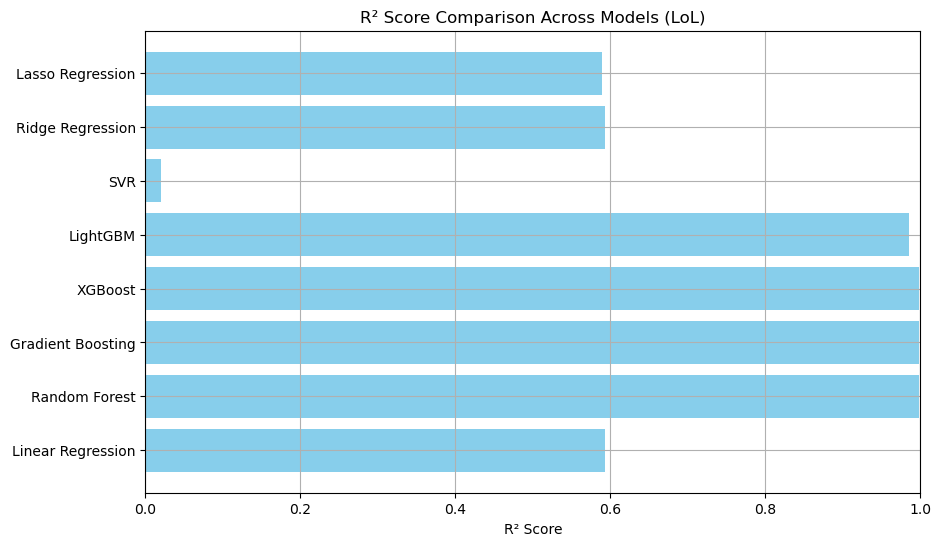

In [121]:
# Plot R² scores for comparison
plt.figure(figsize=(10, 6))
model_names_lol = list(r2_scores_lol.keys())
r2_values_lol = list(r2_scores_lol.values())

plt.barh(model_names_lol, r2_values_lol, color='skyblue')
plt.xlabel('R² Score')
plt.title('R² Score Comparison Across Models (LoL)')
plt.xlim(0, 1)  # R² score ranges from 0 to 1
plt.grid(True)
plt.show()
